<a href="https://colab.research.google.com/github/bharatbajoria/Summer-Internship/blob/master/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PDF Reading

In [0]:
pip install pyPDF2

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for pyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=979413f48274244487e948cb7ade0e4012a203ecfc321e05bd6e65fa12fd8d86
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built pyPDF2


In [0]:
import PyPDF2

In [0]:
#Taking file input
#number of files
nf=2

file= open('Apr-18.PDF','rb')
file1= open('Apr-17.PDF','rb')
  

In [0]:
#A list of files
file_list=[file,file1]

In [0]:
# Reading number of pages
pages=[]

for i in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[i])
  n1=pdfReader.numPages
  pages.append(n1)

In [0]:
# A list containing all files, All_Docs[i] is i-th file 
# All_Docs[i][j] is j-th page of i-th file
All_Docs=[] 

In [0]:

for j in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[j])
  file_text=[] #takes string of page text
  for i in range(pages[j]):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    file_text.append(a)
  
  All_Docs.append(file_text)

In [0]:
type(All_Docs[0][1]),type(All_Docs[0])

(str, list)

# Finding Optimal number of Clusters

In [0]:
Dup_All_Docs=All_Docs[:]

In [0]:
type(Dup_All_Docs[0][0])

str

In [0]:
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

import pandas as pd
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from nltk.corpus import stopwords
import gensim

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
en_stop.add('the')#The is not in stopwords

In [0]:
tokens=[]


for j in All_Docs:
  x=[]
  for i in j:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
  tokens.extend(x)

In [0]:
len(tokens),tokens[:10]

(7941,
 ['press',
  'release',
  'department',
  'communication',
  'central',
  'office',
  'marg',
  'mumbai',
  'phone',
  'fax'])

In [0]:
#df9['Cleaned_PaperText'] = pd.Series(tokens)
        
vectorizer = TfidfVectorizer()

Y = vectorizer.fit_transform(tokens)

In [0]:
#Not Working

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Y)
    kmeanModel.fit(Y)
   # distortions.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [0]:
#2nd Method using Silhouette Score

n=0
ss=0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(Y)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Y, label, metric='euclidean')  
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    if sil_coeff>ss:
      ss=sil_coeff
      n=n_cluster

For n_clusters=2, The Silhouette Coefficient is 0.012989573563197925
For n_clusters=3, The Silhouette Coefficient is 0.029023579644137182
For n_clusters=4, The Silhouette Coefficient is 0.03915783666437281
For n_clusters=5, The Silhouette Coefficient is 0.038753720945066274
For n_clusters=6, The Silhouette Coefficient is 0.06171808458134063
For n_clusters=7, The Silhouette Coefficient is 0.0533839790900729
For n_clusters=8, The Silhouette Coefficient is 0.05708314994252621
For n_clusters=9, The Silhouette Coefficient is 0.07076517894761188
For n_clusters=10, The Silhouette Coefficient is 0.08633032778585085


In [0]:
print("Optimal numbers of clusters are : {}".format(n))

Optimal numbers of clusters are : 10


# LDA

In [0]:

import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel,LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt


In [0]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:

dictionary=Dictionary([[i] for i in tokens])

In [0]:
print(dictionary)

Dictionary(2065 unique tokens: ['press', 'release', 'department', 'communication', 'central']...)


In [0]:
X=[dictionary.doc2bow([sents]) for sents in tokens]#getting bag of words.
tfidf=TfidfModel(X)

print(type(tfidf))
X=tfidf[X]


<class 'gensim.models.tfidfmodel.TfidfModel'>


In [0]:
from gensim.models import LdaMulticore,CoherenceModel

lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)
lda1=LdaModel(X,num_topics=n,id2word=dictionary,update_every=5)

#lda.print_topics()

In [0]:

ldatopics = [[(word,prob) for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
lda.show_topics(formatted=True)

[(0,
  '0.073*"inflation" + 0.043*"rate" + 0.033*"food" + 0.014*"cpi" + 0.012*"policy" + 0.012*"output" + 0.010*"impact" + 0.010*"markets" + 0.009*"could" + 0.009*"would"'),
 (1,
  '0.021*"also" + 0.021*"meeting" + 0.018*"global" + 0.016*"level" + 0.015*"last" + 0.013*"sector" + 0.009*"headline" + 0.009*"banks" + 0.008*"policy" + 0.008*"services"'),
 (2,
  '0.051*"february" + 0.027*"second" + 0.017*"the" + 0.016*"march" + 0.016*"manufacturing" + 0.014*"cent" + 0.014*"first" + 0.014*"central" + 0.014*"price" + 0.011*"impact"'),
 (3,
  '0.035*"mpc" + 0.016*"expected" + 0.013*"vote" + 0.013*"pulses" + 0.012*"stance" + 0.012*"recent" + 0.010*"points" + 0.010*"term" + 0.009*"set" + 0.008*"upside"'),
 (4,
  '0.026*"trade" + 0.025*"growth" + 0.024*"inflation" + 0.016*"months" + 0.012*"outlook" + 0.012*"pmi" + 0.012*"volatility" + 0.010*"crude" + 0.010*"domestic" + 0.010*"goods"'),
 (5,
  '0.026*"risks" + 0.025*"policy" + 0.022*"activity" + 0.014*"bank" + 0.012*"high" + 0.012*"gdp" + 0.011*"st

# LSI HDP

In [0]:
lsi=  LsiModel(corpus=X, num_topics=n, id2word=dictionary,)
hdp=  HdpModel(corpus=X, id2word=dictionary)

In [0]:
lsi_words=[topic for topicid, topic in  lsi.show_topics() ]
lsi_words

['-1.000*"inflation" + 0.000*"financial" + -0.000*"gst" + 0.000*"india" + 0.000*"hra" + 0.000*"central" + -0.000*"confidence" + 0.000*"data" + -0.000*"upside" + 0.000*"macroeconomic"',
 '1.000*"the" + 0.002*"international" + 0.002*"banks" + 0.002*"repo" + 0.001*"commodity" + 0.001*"indicators" + -0.001*"billion" + 0.001*"vote" + 0.001*"due" + -0.001*"rbi"',
 '1.000*"per" + 0.002*"decline" + 0.002*"half" + -0.002*"expectations" + 0.002*"demonetisation" + 0.002*"deficit" + -0.002*"repo" + 0.002*"front" + 0.001*"three" + 0.001*"rise"',
 '-1.000*"cent" + -0.003*"gdp" + 0.003*"growth" + 0.002*"india" + 0.002*"fiscal" + -0.002*"consumer" + -0.002*"month" + -0.002*"market" + -0.002*"rates" + -0.002*"survey"',
 '-1.000*"growth" + -0.003*"cent" + -0.002*"financial" + 0.002*"basis" + 0.002*"current" + 0.002*"markets" + 0.002*"target" + -0.002*"this" + -0.002*"gdp" + -0.002*"non"',
 '1.000*"prices" + 0.003*"three" + 0.002*"there" + 0.002*"account" + 0.002*"remain" + 0.002*"basis" + 0.002*"centre"

In [0]:
hdp_words=[topic for topicid, topic in  lsi.show_topics() ]
hdp_words

['-1.000*"inflation" + 0.000*"financial" + -0.000*"gst" + 0.000*"india" + 0.000*"hra" + 0.000*"central" + -0.000*"confidence" + 0.000*"data" + -0.000*"upside" + 0.000*"macroeconomic"',
 '1.000*"the" + 0.002*"international" + 0.002*"banks" + 0.002*"repo" + 0.001*"commodity" + 0.001*"indicators" + -0.001*"billion" + 0.001*"vote" + 0.001*"due" + -0.001*"rbi"',
 '1.000*"per" + 0.002*"decline" + 0.002*"half" + -0.002*"expectations" + 0.002*"demonetisation" + 0.002*"deficit" + -0.002*"repo" + 0.002*"front" + 0.001*"three" + 0.001*"rise"',
 '-1.000*"cent" + -0.003*"gdp" + 0.003*"growth" + 0.002*"india" + 0.002*"fiscal" + -0.002*"consumer" + -0.002*"month" + -0.002*"market" + -0.002*"rates" + -0.002*"survey"',
 '-1.000*"growth" + -0.003*"cent" + -0.002*"financial" + 0.002*"basis" + 0.002*"current" + 0.002*"markets" + 0.002*"target" + -0.002*"this" + -0.002*"gdp" + -0.002*"non"',
 '1.000*"prices" + 0.003*"three" + 0.002*"there" + 0.002*"account" + 0.002*"remain" + 0.002*"basis" + 0.002*"centre"

In [138]:
#Misc.
ldatopics_word = [[word for word, prob in topic] for topicid, topic in lda.show_topics(num_words=100,formatted=False)]
ldatopics_prob = [[prob for word, prob in topic] for topicid, topic in lda.show_topics(num_words=100,formatted=False)]

col=[]
a='Topic-'
c=''
for i in range(n):
  c+=a+str(i+1)
  col.append(c)
  c=''

len(col),len(ldatopics_word)

#topic_df=pd.DataFrame(data=ldatopics_word,columns=col)
topic_df=pd.DataFrame(data=ldatopics_word,index=col)
ldatopics_prob
k=0
for i in ldatopics_prob:
  k=0
  for j in i:
    k+=j
  
  #print(k)

topic_df.T

,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,Topic-10
0,meeting,inflation,the,growth,inflation,cent,prices,cent,rate,statement
1,mpc,february,per,expected,food,outlook,bank,year,policy,january
2,prices,growth,also,policy,per,impact,several,headline,liquidity,monetary
3,crude,trade,risks,target,the,would,month,manufacturing,output,around
4,financial,high,global,effects,headline,reserve,production,policy,committee,increase
...,...,...,...,...,...,...,...,...,...,...
95,magnitude,balance,internal,latter,cycle,real,return,under,watch,reversal
96,need,declined,main,employment,uptick,moved,election,committed,euro,viral
97,leading,large,fourth,gauge,buoyant,allowance,averaged,west,projection,situation
98,regaining,suggests,bills,poses,indications,induced,picked,most,items,vehicles


In [0]:
topic_df_T=topic_df.T

**Adding New File**

In [0]:

new_file=open('Apr-20.PDF','rb')
pdfReader = PyPDF2.PdfFileReader(new_file)
n1=pdfReader.numPages

new_file_pg=[]
for i in range(n1):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    new_file_pg.append(a)

#new_file_pg[:3]

In [0]:
new_token=[]
x=[]
for i in new_file_pg:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
    new_token.extend(x)


Z=[dictionary.doc2bow([sents]) for sents in new_token]

In [0]:
newlda=lda1[Z]


In [0]:
len(Z)

32176

In [0]:
new_topic=[]
for topic in newlda:
  #new_topic.append(prob)
  new_topic.append(topic)

In [0]:
len(new_topic),type(new_topic[0])#,new_topic[:2]

(32176, list)

In [0]:
lda1.get_document_topics(Z,per_word_topics=True)

# Evaluating Model: Topic Wise


In [0]:
tk=[[i] for i in tokens]
ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
#lda_coherence

In [0]:

tk=[[i] for i in tokens]
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(formatted=False)]

for i in range(n):
  lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)
  ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
  lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
  #coherence_score.append(lda_coherence)



Coherence Score

In [0]:
coherence_score=[]

lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=tk, dictionary=dictionary, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=tk, dictionary=dictionary, window_size=10).get_coherence()


coherence_score.append(lda_coherence)
coherence_score.append(lsi_coherence)
coherence_score.append(hdp_coherence)

coherence_score

[0.7122775445079084, 0.7080731853714533, 0.8232774203480668]

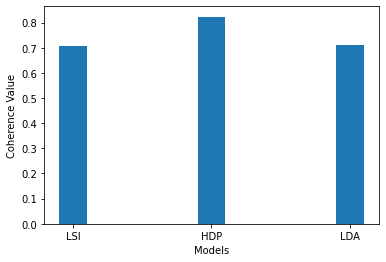

In [0]:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')



evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])
best_score=max(coherence_score)
i=coherence_score.index(best_score)

Data Frames for different Models

In [0]:
#LDA Data Frame

num_words_model=50
ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(num_words=num_words_model,formatted=False)]
col_lda=[]
a='Topic'
for i in range(len(ldatopics)):
  col_lda.append(a+str(i+1))

topic_df_lda=pd.DataFrame(data=ldatopics,index=col_lda)
topic_df_T_lda=topic_df_lda.T

#LSI Data Frame
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(num_words=num_words_model,formatted=False)]
col_lsi=[]
a='Topic'
for i in range(len(lsitopics)):
  col_lsi.append(a+str(i+1))
  
topic_df_lsi=pd.DataFrame(data=lsitopics,index=col_lsi)
topic_df_T_lsi=topic_df_lsi.T

#HDP Data Frame
hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(num_words=num_words_model,formatted=False)]
col_hdp=[]
a='Topic'
for i in range(len(hdptopics)):
  col_hdp.append(a+str(i+1))
topic_df_hdp=pd.DataFrame(data=hdptopics,index=col_hdp)
topic_df_T_hdp=topic_df_hdp.T


In [0]:
topic_df_T_lda.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,meeting,inflation,the,growth,inflation,cent,prices,cent,rate,statement
1,mpc,february,per,expected,food,outlook,bank,year,policy,january
2,prices,growth,also,policy,per,impact,several,headline,liquidity,monetary
3,crude,trade,risks,target,the,would,month,manufacturing,output,around
4,financial,high,global,effects,headline,reserve,production,policy,committee,increase


In [0]:
topic_df_T_lsi.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,inflation,the,per,cent,growth,prices,february,policy,food,year
1,financial,international,decline,gdp,cent,three,support,one,expectations,march
2,gst,banks,half,growth,financial,there,deficit,half,non,gdp
3,india,repo,expectations,india,basis,account,three,remained,there,round
4,hra,commodity,demonetisation,fiscal,current,remain,expectations,round,year,remained


In [0]:
topic_df_T_hdp.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,penetrate,across,spite,job,yield,actual,seasonality,resolution,based,officer,venue,fundamentals,finances,for,fed,fourteenth,tenors,consume,neut,made
1,unrelenting,weaker,electricity,measured,comparison,derail,meeting,pick,exports,gauge,headroom,still,based,nascent,harbinger,feed,steps,sources,picking,handsomely
2,rise,remonetisation,characterising,recipient,indian,event,durable,conditions,sipate,ris,outcome,simultaneously,rebound,confirmed,performance,attend,ere,foreca,volumes,count
3,regard,comparable,tempered,ross,india,gets,steadily,new,forecasters,fronts,remained,seasonality,drained,sowing,shift,improvement,inflationary,imposition,scheduled,mainly
4,materialises,costs,compiled,inflationary,globally,multilateral,pick,narrowed,emes,followed,bounced,reasonable,widening,consumer,last,sowing,phone,upbeat,amusement,complete


# Evaluating Words in a Topic : Cosine scores.

In [0]:
#Dup_All_Docs=All_Docs[0]+All_Docs[1]
Dup_All_Docs=[]
for i in All_Docs:
  Dup_All_Docs+=i

df=[]

In [0]:
for j in All_Docs:
  for i in j:
    df.append(i)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectoriser = CountVectorizer().fit(Dup_All_Docs)
X = vectoriser.transform(Dup_All_Docs)
df_vec=pd.DataFrame(X.A, columns=sorted(vectoriser.vocabulary_.keys(), key=lambda k: vectoriser.vocabulary_[k]))

In [0]:
df_page=pd.DataFrame(data=Dup_All_Docs)
#df_page.head()

In [0]:
type(df),len(df)

(list, 26)

In [0]:
word_data=[]

for i in df:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    word_data.append(token)

In [0]:
model1 = gensim.models.Word2Vec(word_data, min_count = 1,size = 100, window = 5) 

In [0]:
topic_df_T

,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,Topic-10
0,inflation,also,february,mpc,trade,risks,cent,inflation,prices,per
1,rate,meeting,second,expected,growth,policy,growth,prices,per,headline
2,food,global,the,vote,inflation,activity,the,effects,outlook,policy
3,cpi,level,march,pulses,months,bank,year,likely,bank,fuel
4,policy,last,manufacturing,stance,outlook,high,reserve,per,may,basis
5,output,sector,cent,recent,pmi,gdp,march,economic,also,market
6,impact,headline,first,points,volatility,statistical,investment,fiscal,statement,rising
7,markets,banks,central,term,crude,capital,committee,demand,expected,several
8,could,policy,price,set,domestic,hardening,production,due,april,risk
9,would,services,impact,upside,goods,account,economy,target,year,meeting


Calculating statistical significance through Cosine Similarity Score

In [0]:

import statistics 
from scipy import stats
from statistics import stdev

ds=[]
def statistical_signficance(topic_df_T,col,alpha,null_hyp):
  #topics_df_T: Dataframe of words for any model
  #col: Mtx with Topic Header, col[i]= Topic-i
  #alpha: Critical p-Value for rejecting null hypothesis
  #null_hyp: Value of mean for Null Hypothesis
  Average_comparison=null_hyp
  ds=[]
  for i in range((len(col))) :
    ds.append(list(topic_df_T[col[i]]))

  ds# ds[i] is i-th list of Topic-i

  simscore_topic=[]#initiating mtx for sim scores/cosine scores


  for p in range(len(ds)):
    k=len(ds[p])
    o=0

    sim=[]
    simt=[]
  
    for i in range(k):
      simt=[]
      for j in range(k)  :
        o=model1.similarity(ds[p][i],ds[p][j])
        simt.append(o)

      sim.append(simt)

    simscore_topic.append(sim)
# 3-D list, simscore_topic[i] is similarity scores for topic-i
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words


  
  t_score_all=[]
  p_value_all=[]
  mean=0
  sd=0

  t_value=0
  dup_score=[]
  p=0
  p_value=[]
  t2=0
  for i in range(len(ds)):
    
    t=[]
    p_value_topic=[]
    for j in range(len(ds[i])):         
      dup_score=simscore_topic[i][j][:]    
      dup_score.pop(j)# removing score of i-th element with itself which is=1
      t2,p=stats.ttest_1samp(np.array(dup_score),popmean=np.array(Average_comparison))
      
      t.append(t2)
      p_value_topic.append(p)
      pass

    t_score_all.append(t)
    p_value_all.append(p_value_topic)
  
  t=0
  word_to_remove=[] #initializing tuple to save topicid and word outside cluster
  for i in range(len(p_value_all)):
    word=[]
    for j in range(len(p_value_all)):
      if (p_value_all[i][j]>= alpha) or(t_score_all[i][j]<0):
        word.append(ds[i][j])
    
    if len(word)>0:
      t+=len(word)#counting number of words to be removed
    
    word_to_remove.append(word)


# word_to_remove[i] list of words to remove from topic-i
#ds[i] list of words in topic-i
#t number of words to be removed in a algorithm
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words

  
  return word_to_remove,ds,t

In [135]:
#LDA
alpha=0.05
null_hyp=0.5

topic_df_T_lda
col_lda

lda_words_to_remove,lda_words,number_words_removed_lda=statistical_signficance(topic_df_T_lda,col_lda,alpha,null_hyp)
#lda_words_to_remove[i] is list of words to remove from topic-i
#lda_words[i] is list of all words in topic-i
#number_words_removed_lda is no. of words removed from all topics of LDA




#LSI

topic_df_T_lsi
col_lsi

lsi_words_to_remove,lsi_words,number_words_removed_lsi=statistical_signficance(topic_df_T_lsi,col_lsi,alpha,null_hyp)


#HDP

topic_df_T_hdp
col_hdp

hdp_words_to_remove,hdp_words,number_words_removed_hdp=statistical_signficance(topic_df_T_hdp,col_hdp,alpha,null_hyp)

words_removed=[number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda]

print(words_removed)

#for i in range(len(lda_words)):
  #print("Topic:",i)
  #print(lda_words[i])
  #print("Words to remove:")
  #print(lda_words_to_remove)
  #print("\n")


[59, 400, 25]


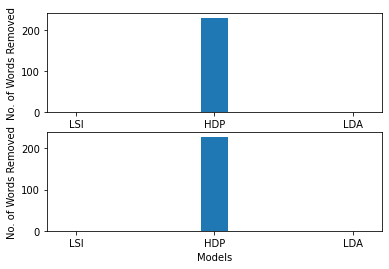

In [108]:
def evaluate_bar_graph(coherences, indices):
    plt.subplot(2,1,1)
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('No. of Words Removed')

    plt.subplot(2,1,2)
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('No. of Words Removed')

    plt.show()




evaluate_bar_graph([number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda],
                   ['LSI', 'HDP', 'LDA'])


In [0]:
#Dynamically creating Data Frames
gbl = globals()


#df_topic_name = ['SymbolA','SymbolB', 'SymbolC' .... 'SymbolN']

for i in range(len(col)):   

   gbl[str('df')+col[i]] = pd.DataFrame(simscore_topic[i],index=ds[i],columns=ds[i])
   print("Similarity Scores matrix for Topic-{}".format(i+1))
   print(gbl[str('df')+col[i]])
   print("\n\n")

NameError: ignored

In [0]:
#Topic1_df=pd.DataFrame(simscore_topic[0],index=ds[0],columns=ds[0])
gbl.items()

In [0]:
gbl[Topic-1]